In [2]:
import progressbar

from dataset_handler import get_dewarped_metadata,get_edge_results,get_dewarped_data
from DataTypes import IrData
import os
import user_config as ucfg
import numpy as np
import matplotlib.pyplot as plt
from IR_analysis import get_dewarp_parameters,sort_corner_points
import cv2


In [3]:
exp_name = 'lfs_pmma_DE_6mm_tc_R1_IR'

In [4]:
metadata = get_dewarped_metadata(exp_name)
edge_results = get_edge_results(exp_name)
data =IrData(os.path.join(ucfg.get_path('data_folder'),exp_name.replace('IR','0001'))    )

In [5]:
trans_matrix = metadata['transformation_matrix']
start,end = metadata['frame_range']
selected_points = metadata['selected_points']

In [6]:
def get_dst_coordinates(x,y,transformation_matrix):
    dst_x = (transformation_matrix[0, 0] * x + transformation_matrix[0, 1] * y + transformation_matrix[
    0, 2]) / (transformation_matrix[2, 0] * x + transformation_matrix[2, 1] * y + transformation_matrix[
    2, 2])
    dst_y = (transformation_matrix[1, 0] * x + transformation_matrix[1, 1] * y + transformation_matrix[
        1, 2]) / (transformation_matrix[2, 0] * x + transformation_matrix[2, 1] * y + transformation_matrix[
        2, 2])
    return dst_x,dst_y

In [7]:
frame_nr = 2250

In [9]:
import progressbar
bar = progressbar.ProgressBar()
for frame_nr in bar(range(250,2250)):
    if os.path.exists(f'video/{frame_nr}.png'):
        continue
    frame = data.get_frame(frame_nr + start)
    x = edge_results[frame_nr]
    y = np.arange(0, len(edge_results[frame_nr]))
    dst_x,dst_y = get_dst_coordinates(x,y,transformation_matrix=np.linalg.inv(trans_matrix))
    
    # plt.imshow(frame)
    # plt.scatter(dst_x,dst_y)
    frame = cv2.normalize(frame,None)*255
    # frame = cv2.polylines(frame,points,isClosed=False,color=255)

    plt.figure(figsize = (10,10))
    plt.imshow(frame[::],cmap ='hot')
    plt.plot(dst_x[5:-5],dst_y[5:-5],marker=None,c='white')
    plt.gca().invert_yaxis()
    plt.savefig(f'video/{frame_nr}.png')
    plt.close()

100% (2000 of 2000) |####################| Elapsed Time: 0:01:09 Time:  0:01:09


In [22]:
import shutil
files = sorted(os.listdir(),key=lambda x: int(x[5:].split('.')[0]))
for i,file in enumerate(files):
    frame_nr = int(file[5:].split('.')[0])
    shutil.move(file, f'frame{i:04d}.png')
    


In [13]:
os.chdir('video')

In [24]:
os.chdir('..')

In [31]:
import progressbar
bar = progressbar.ProgressBar()
for i,frame_nr in bar(enumerate(range(250,2250))):
    # if os.path.exists(f'video/{frame_nr}.png'):
    #     continue
    frame = get_dewarped_data(exp_name)[:,:,frame_nr]
    x = edge_results[frame_nr]
    y = np.arange(0, len(edge_results[frame_nr]))
    # dst_x,dst_y = get_dst_coordinates(x,y,transformation_matrix=np.linalg.inv(trans_matrix))
    
    # plt.imshow(frame)
    # plt.scatter(dst_x,dst_y)
    # frame = cv2.normalize(frame,None)*255
    # frame = cv2.polylines(frame,points,isClosed=False,color=255)

    plt.figure(figsize = (15,15))
    plt.imshow(frame[::],cmap ='hot')
    plt.plot(x[5:-5],y[5:-5],marker=None,c='blue')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig(f'video_dewarped/{i:04d}.png')
    plt.close()

| |           #                                    | 1999 Elapsed Time: 0:10:25


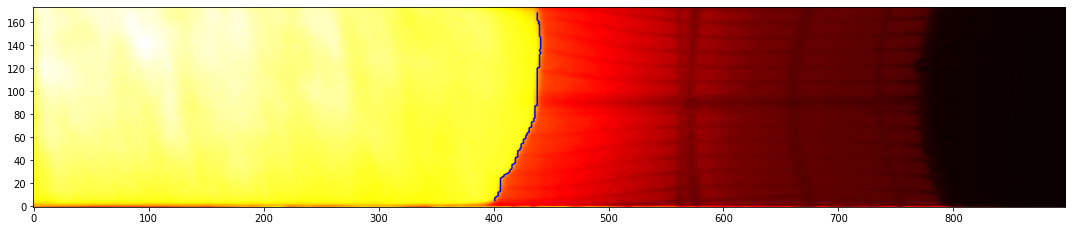

In [29]:
    frame = get_dewarped_data(exp_name)[:,:,frame_nr]
    x = edge_results[frame_nr]
    y = np.arange(0, len(edge_results[frame_nr]))
    # dst_x,dst_y = get_dst_coordinates(x,y,transformation_matrix=np.linalg.inv(trans_matrix))
    
    # plt.imshow(frame)
    # plt.scatter(dst_x,dst_y)
    # frame = cv2.normalize(frame,None)*255
    # frame = cv2.polylines(frame,points,isClosed=False,color=255)

    plt.figure(figsize = (15,15))
    plt.imshow(frame[::],cmap ='hot')
    plt.plot(x[5:-5],y[5:-5],marker=None,c='white')
    plt.gca().invert_yaxis()
    plt.tight_layout()


In [27]:
selected_points

array([[239, 447],
       [239, 337],
       [628, 316],
       [628, 475]])

In [28]:
get_dst_coordinates(898,-174,np.linalg.inv(trans_matrix))

(627.9999999999999, 156.99999999999991)

In [29]:
get_dewarped_data(exp_name)[:,:,frame_nr].shape

(174, 898)

In [30]:
target_width = metadata['target_pixels_width']
target_height = metadata['target_pixels_height']
target_ratio = metadata['target_ratio']

In [31]:
get_dewarp_parameters(sort_corner_points(selected_points),target_ratio=target_ratio)['transformation_matrix']

array([[ 4.59416326e+00, -7.47645320e-16, -1.09800502e+03],
       [ 1.17571350e-01,  2.17786930e+00, -7.62041507e+02],
       [ 1.57662730e-03, -8.96117209e-19,  1.00000000e+00]])

In [110]:
trans_matrix

array([[ 4.59416326e+00, -7.47645320e-16, -1.09800502e+03],
       [ 1.17571350e-01,  2.17786930e+00, -7.62041507e+02],
       [ 1.57662730e-03, -8.96117209e-19,  1.00000000e+00]])